In [361]:
# 라이브러리 가져오기
# 라이브러리 가져오기
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.font_manager as fm
import matplotlib as mpl
plt.rc('font', family='Malgun Gothic') # For Windows
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [362]:
df = pd.read_csv("./datasets/최종.csv",index_col=0)
df.columns

Index(['회사명', '거래소코드', '회계년도', '대주주지분변화분', '외국인지분분변화', '상장일', '자산',
       '당기순이익(손실)', '비유동자산증가율', '유동자산증가율', '자기자본증가율', '매출액증가율', '정상영업이익증가율',
       '순이익증가율', '총포괄이익증가율', '매출액순이익률', '총자본순이익률', '자기자본순이익률', '매출원가대매출액비율',
       '광고선전비대매출액비율', '유보율', '비유동비율', '유동비율', '당좌비율', '현금비율', '부채비율', '유동부채비율',
       '차입금비율', '이자보상배율(이자비용)', '유보액대비율', '유보액대납입자본배율', '투자집중도',
       '통계청 한국표준산업분류 10차(대분류)', '직급명', '1인평균지급액(임원)', '1인년간평균급여(직원)', '토빈Q',
       'target', 'WW지수', 'RDS', '수명주기', '산업평균_총자산증가율차분', '설립일', '보통주식비율',
       '외국인_주식분포비율'],
      dtype='object')

In [363]:
df['업력'] = pd.to_datetime(df['회계년도'],format='%Y').dt.strftime('%Y').astype('int')- pd.to_datetime(df['설립일']).dt.strftime('%Y').astype('int') 
df.drop(['설립일'],axis=1,inplace=True)

In [364]:
## 업력 = 회계년도  -설립일
df['업력'] 

0        63
1        64
2        65
3        66
4        67
         ..
12082    55
12083    51
12084    52
12085    53
12086    54
Name: 업력, Length: 12087, dtype: int32

In [365]:
df['target'].value_counts()

0    8539
1    3548
Name: target, dtype: int64

In [366]:
## 11~12년도는 y taget 설정조건으로 인하여 제거

bef_df = df[~(df['회계년도'].isin([2011,2012]))].reset_index(drop=True)

In [367]:
### 회계년도 기준 split

train = bef_df[bef_df['회계년도']<=2019].reset_index(drop=True)
test = bef_df[bef_df['회계년도']>=2020].reset_index(drop=True)


In [368]:
# test셋 에서 성장성 컬럼이 0인 값 삭제 
test = test[test['비유동자산증가율'] != 0]
test = test[test['순이익증가율'] != 0]
test = test[test['정상영업이익증가율'] != 0]
test = test[test['총포괄이익증가율'] != 0]
test.reset_index(drop=True, inplace=True)

In [369]:
# train 데이터에서 0인 값 '총자본증가율','비유동자산증가율','유동자산증가율','자기자본증가율' 중앙값으로 대체

col_list = ['비유동자산증가율','유동자산증가율','자기자본증가율']
ind = train.index

for i in col_list:
    med = train[i].median()
    for j in ind:
        if train.loc[j,i] == 0 :
            train.loc[j,i] = med
    

In [370]:
# train 데이터에서 0인 값 '정상영업이익증가율','순이익증가율','총포괄이익증가율' 평균값으로 대체# 
col_list = ['정상영업이익증가율','순이익증가율','총포괄이익증가율']
ind = train.index
for i in col_list:
    mean = train[i].mean()
    for j in ind:
        if train.loc[j,i] ==0:
            train.loc[j,i] = mean

In [371]:
df = pd.concat([train, test], axis=0)
df.reset_index(drop=True,inplace=True)

In [372]:
df.drop(["1인평균지급액(임원)",'직급명'],axis=1, inplace=True)

In [373]:
df["target"].value_counts()

0    6927
1    3047
Name: target, dtype: int64

In [374]:
# 최종데이터에서 금융관련 기업 추출
ind_금융 = df[df["통계청 한국표준산업분류 10차(대분류)"].str.contains("금융")]["회사명"].index

# 금융 관련 기업 삭제
df.drop(index=ind_금융, axis=0, inplace=True)

In [375]:
# 결측치 확인  - 엄슴
df.isna().sum().sum()

0

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9914 entries, 0 to 9973
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   회사명                    9914 non-null   object 
 1   거래소코드                  9914 non-null   float64
 2   회계년도                   9914 non-null   float64
 3   대주주지분변화분               9914 non-null   float64
 4   외국인지분분변화               9914 non-null   float64
 5   상장일                    9914 non-null   object 
 6   자산                     9914 non-null   float64
 7   당기순이익(손실)              9914 non-null   float64
 8   비유동자산증가율               9914 non-null   float64
 9   유동자산증가율                9914 non-null   float64
 10  자기자본증가율                9914 non-null   float64
 11  매출액증가율                 9914 non-null   float64
 12  정상영업이익증가율              9914 non-null   float64
 13  순이익증가율                 9914 non-null   float64
 14  총포괄이익증가율               9914 non-null   float64
 15  매출액순

In [377]:
# 양의 무한대 값 추출 --엄슴
print(len(df[df.values == math.inf]))

# 음의 무한대 값 추출 --엄슴
print(len(df[df.values ==-np.inf]))

0
0


In [378]:
# 숫자현 컬럼만 있는 데이터프레임 생성 
# df_1 = df[df.select_dtypes(float).columns]

# 숫자형 데이터프레임 컬럼 추출
# col_int=df_1.columns

#  데이터 박스플롯으로 보기

# plt.figure(figsize=(20,20))

# for i in range(1,35,1):
#     plt.subplot(5,7,i)
#     a = df_1.iloc[:,i]
#     plt.boxplot(a)
#     b = col_int.str[:7][i-1]
#     plt.title(b)
# plt.show()
   
        

## 박스플롯 이상치 제거
- 박스플롯을 이용해서 현저하게 이상한 값이 관측되는 컬럼 제거

In [379]:
df["당좌비율"].max()

42354.18

In [380]:
df[df["당좌비율"] == 42354.18]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,당기순이익(손실),비유동자산증가율,유동자산증가율,...,1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기,산업평균_총자산증가율차분,보통주식비율,외국인_주식분포비율,업력
991,(주)메지온,140410.0,2013.0,0.0,0.07,2012/01/20,63339954.0,-830752.0,-34.02,-2.24,...,135423.0,1.895111,0,-2.63464,0.223192,쇠퇴기,-5.930169,41.76,24.1,11


In [381]:
df.drop(index=991, axis=0 ,inplace=True)
df.reset_index(drop=True,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x157cfa67be0>,
 'caps': [<matplotlib.lines.Line2D at 0x157cfa521c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x157cfa67910>],
 'medians': [<matplotlib.lines.Line2D at 0x157cfa52760>],
 'fliers': [<matplotlib.lines.Line2D at 0x157cfa52a30>],
 'means': []}

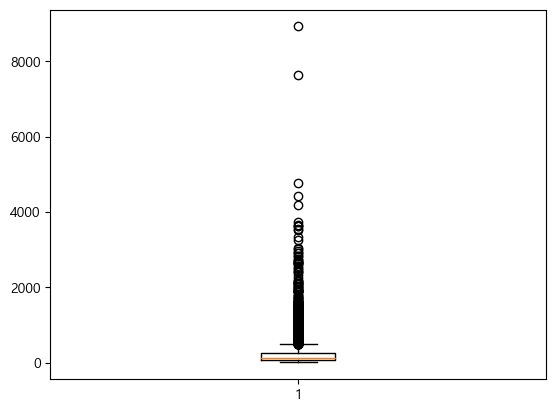

In [382]:
plt.boxplot(df["당좌비율"])

In [383]:
df[df["자기자본증가율"] >= 700]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,당기순이익(손실),비유동자산증가율,유동자산증가율,...,1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기,산업평균_총자산증가율차분,보통주식비율,외국인_주식분포비율,업력
7777,하이즈항공(주),221840.0,2015.0,15.28,-13.93,2015/11/25,124460894.0,3434991.0,49.33,383.58,...,27000.0,0.337871,0,-1.022902,0.006971,성장기,148.259253,43.42,0.41,14
9112,(주)키다리스튜디오,20120.0,2021.0,-23.93,-0.76,1996/07/03,290122175.0,3548090.0,817.49,216.70,...,59953.0,2.084365,0,5.733984,0.000000,성숙기,502.365704,46.17,1.59,34


In [384]:
df[df["자기자본증가율"] == 719.48]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,당기순이익(손실),비유동자산증가율,유동자산증가율,...,1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기,산업평균_총자산증가율차분,보통주식비율,외국인_주식분포비율,업력
9112,(주)키다리스튜디오,20120.0,2021.0,-23.93,-0.76,1996/07/03,290122175.0,3548090.0,817.49,216.7,...,59953.0,2.084365,0,5.733984,0.0,성숙기,502.365704,46.17,1.59,34


In [385]:
df.drop(index=9112, axis=0 , inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x157cb29a550>,
 'caps': [<matplotlib.lines.Line2D at 0x157cb29aaf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x157cb29a280>],
 'medians': [<matplotlib.lines.Line2D at 0x157d29590d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x157d29593a0>],
 'means': []}

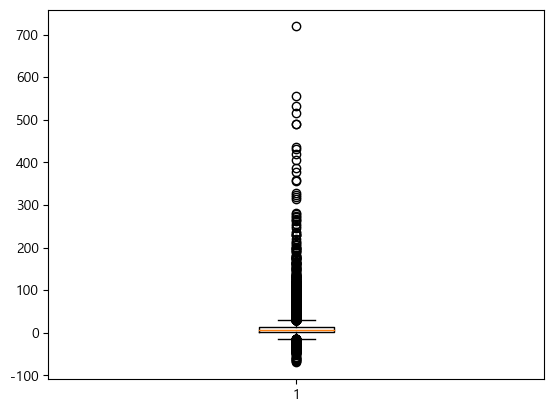

In [386]:
plt.boxplot(df["자기자본증가율"])

In [387]:
df[df["매출원가대매출액비율"]>=300]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,당기순이익(손실),비유동자산증가율,유동자산증가율,...,1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기,산업평균_총자산증가율차분,보통주식비율,외국인_주식분포비율,업력
4886,(주)휴맥스홀딩스,28080.0,2017.0,-20.07,0.0,1997/04/16,192627732.0,-659818.0,-13.59,19.68,...,103589.0,0.459561,0,-0.978376,0.0,성숙기,-13.191091,36.55,0.0,28


In [388]:
df.drop(index=4886, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x157d212c790>,
 'caps': [<matplotlib.lines.Line2D at 0x157d212cd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x157d212c490>],
 'medians': [<matplotlib.lines.Line2D at 0x157d2121310>],
 'fliers': [<matplotlib.lines.Line2D at 0x157d21215e0>],
 'means': []}

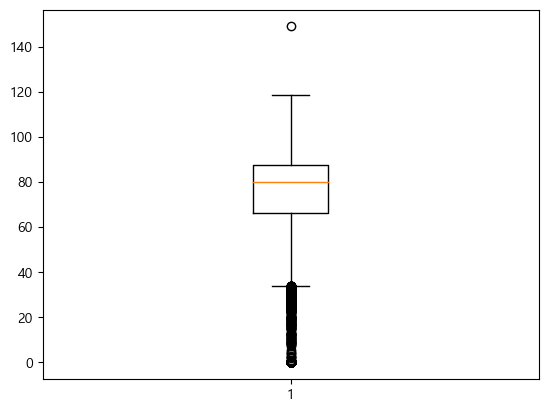

In [389]:
plt.boxplot(df["매출원가대매출액비율"])

In [390]:
df[df["부채비율"]>=2000]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,당기순이익(손실),비유동자산증가율,유동자산증가율,...,1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기,산업평균_총자산증가율차분,보통주식비율,외국인_주식분포비율,업력
4169,(주)티에이치엔,19180.0,2014.0,-2.89,0.0,1996/07/31,208631661.0,6893912.0,-0.92,6.03,...,43118.0,1.072695,0,-1.222779,0.0,성장기,2.605384,36.6,0.0,28


In [391]:
df.drop(index=4169, axis=0,inplace=True)
df.reset_index(drop=True, inplace=True)


{'whiskers': [<matplotlib.lines.Line2D at 0x157d286b640>,
 'caps': [<matplotlib.lines.Line2D at 0x157d286bbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x157d286b370>],
 'medians': [<matplotlib.lines.Line2D at 0x157d28611c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x157d2861490>],
 'means': []}

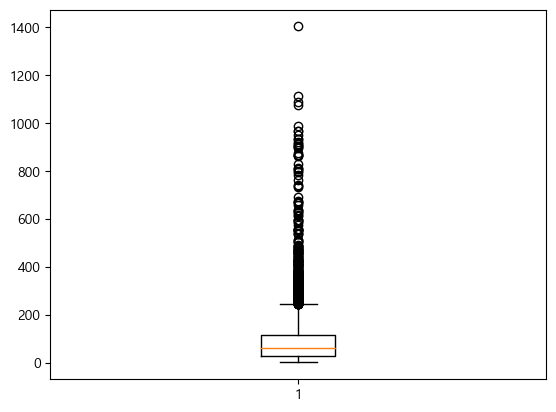

In [392]:
plt.boxplot(df["부채비율"])

In [393]:
df[df["순이익증가율"]>=6e6]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,당기순이익(손실),비유동자산증가율,유동자산증가율,...,1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기,산업평균_총자산증가율차분,보통주식비율,외국인_주식분포비율,업력
2972,(주)위메이드,112040.0,2014.0,0.11,0.23,2009/12/18,542014941.0,222637279.0,85.94,-14.6,...,37000.0,1.35196,0,-1.12527,0.328877,쇠퇴기,47.705384,48.6,6.08,14


In [394]:
df.drop(index=2972, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x157d203b4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x157d203ba60>,
 'boxes': [<matplotlib.lines.Line2D at 0x157d203b1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x157d2067040>],
 'fliers': [<matplotlib.lines.Line2D at 0x157d2067310>],
 'means': []}

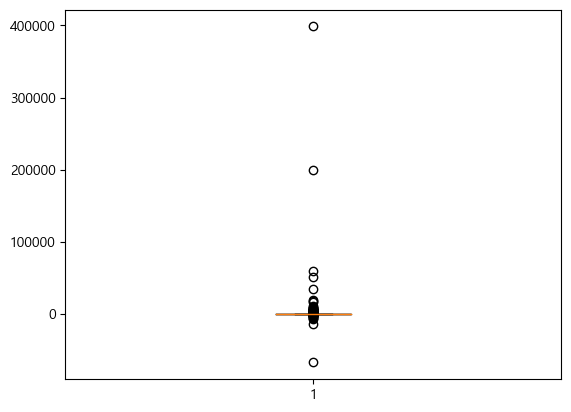

In [395]:
plt.boxplot(df["순이익증가율"])

In [396]:
df["이자보상배율(이자비용)"].value_counts().sort_values(ascending=False)

1.000000e+09    564
4.860000e+00     13
2.080000e+00     12
6.350000e+00     11
2.810000e+00     11
               ... 
1.143600e+02      1
4.888800e+02      1
4.551100e+02      1
4.014100e+03      1
1.646070e+03      1
Name: 이자보상배율(이자비용), Length: 5304, dtype: int64

In [397]:
df[df["매출액순이익률"] >= 2500]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,당기순이익(손실),비유동자산증가율,유동자산증가율,...,1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기,산업평균_총자산증가율차분,보통주식비율,외국인_주식분포비율,업력
1245,(주)비지에프,27410.0,2017.0,0.0,-14.48,2014/05/19,858118605.0,3.507921e+09,-55.05,-55.44,...,64000.0,1.387968,0,-2.83317,0.0,성숙기,-55.411091,50.31,15.3,23


In [398]:
df.drop(index=1245, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x157d21b0250>,
 'caps': [<matplotlib.lines.Line2D at 0x157d21b07f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x157d21bef40>],
 'medians': [<matplotlib.lines.Line2D at 0x157d21b0d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x157d21c30a0>],
 'means': []}

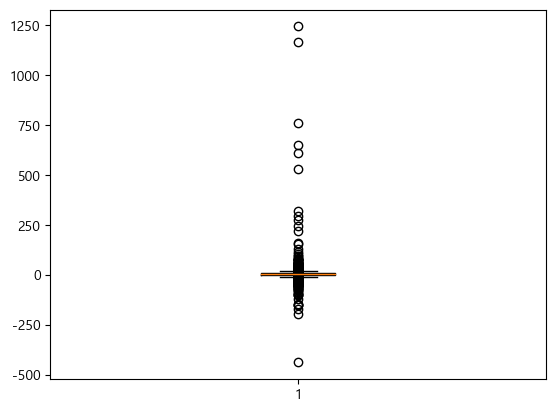

In [399]:
plt.boxplot(df["매출액순이익률"])

In [400]:
df[df["RDS"] >=14]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,당기순이익(손실),비유동자산증가율,유동자산증가율,...,1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기,산업평균_총자산증가율차분,보통주식비율,외국인_주식분포비율,업력
8415,(주)네오위즈홀딩스,42420.0,2021.0,4.88,-4.96,2000/06/27,884107052.0,5059528.0,34.15,6.43,...,60000.0,0.864293,0,-0.277367,15.293005,성숙기,20.215704,42.5,2.99,24


In [401]:
df.drop(index=8415, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x157d38d4130>,
 'caps': [<matplotlib.lines.Line2D at 0x157d38d46d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x157d38e3f10>],
 'medians': [<matplotlib.lines.Line2D at 0x157d38d4c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x157d38d4f40>],
 'means': []}

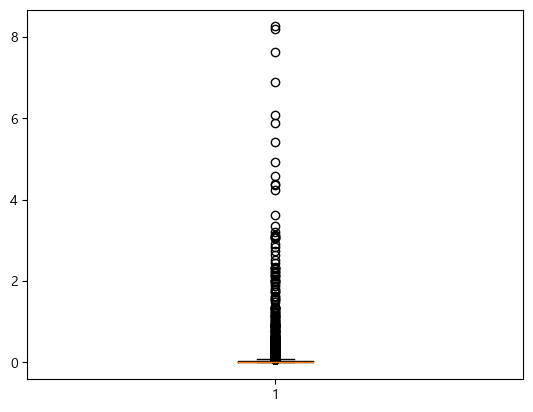

In [402]:
plt.boxplot(df["RDS"])

In [403]:
df['target'].value_counts()

0    6877
1    3030
Name: target, dtype: int64

In [404]:
# 눈에 띄는 이상치만을 제거한 데이터프레인 저장
df.to_csv("./datasets/이상치제거csv/이상치제거전.csv", encoding="UTF-8-sig")

# 이상치 제거

In [444]:
# 이상치 제거를 위한 이상치제거 전 데이터 로드
df = pd.read_csv("./datasets/이상치제거csv/이상치제거전.csv", index_col=0)


In [445]:
df.target.value_counts()

0    6877
1    3030
Name: target, dtype: int64

In [446]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '대주주지분변화분', '외국인지분분변화', '상장일', '자산',
       '당기순이익(손실)', '비유동자산증가율', '유동자산증가율', '자기자본증가율', '매출액증가율', '정상영업이익증가율',
       '순이익증가율', '총포괄이익증가율', '매출액순이익률', '총자본순이익률', '자기자본순이익률', '매출원가대매출액비율',
       '광고선전비대매출액비율', '유보율', '비유동비율', '유동비율', '당좌비율', '현금비율', '부채비율', '유동부채비율',
       '차입금비율', '이자보상배율(이자비용)', '유보액대비율', '유보액대납입자본배율', '투자집중도',
       '통계청 한국표준산업분류 10차(대분류)', '1인년간평균급여(직원)', '토빈Q', 'target', 'WW지수', 'RDS',
       '수명주기', '산업평균_총자산증가율차분', '보통주식비율', '외국인_주식분포비율', '업력'],
      dtype='object')

## 윈저라이징

In [447]:
from scipy.stats.mstats  import winsorize
df.isna().sum()

회사명                      0
거래소코드                    0
회계년도                     0
대주주지분변화분                 0
외국인지분분변화                 0
상장일                      0
자산                       0
당기순이익(손실)                0
비유동자산증가율                 0
유동자산증가율                  0
자기자본증가율                  0
매출액증가율                   0
정상영업이익증가율                0
순이익증가율                   0
총포괄이익증가율                 0
매출액순이익률                  0
총자본순이익률                  0
자기자본순이익률                 0
매출원가대매출액비율               0
광고선전비대매출액비율              0
유보율                      0
비유동비율                    0
유동비율                     0
당좌비율                     0
현금비율                     0
부채비율                     0
유동부채비율                   0
차입금비율                    0
이자보상배율(이자비용)             0
유보액대비율                   0
유보액대납입자본배율               0
투자집중도                    0
통계청 한국표준산업분류 10차(대분류)    0
1인년간평균급여(직원)             0
토빈Q                      0
target                   0
WW지수                     0
R

In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9907 entries, 0 to 9906
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   회사명                    9907 non-null   object 
 1   거래소코드                  9907 non-null   float64
 2   회계년도                   9907 non-null   float64
 3   대주주지분변화분               9907 non-null   float64
 4   외국인지분분변화               9907 non-null   float64
 5   상장일                    9907 non-null   object 
 6   자산                     9907 non-null   float64
 7   당기순이익(손실)              9907 non-null   float64
 8   비유동자산증가율               9907 non-null   float64
 9   유동자산증가율                9907 non-null   float64
 10  자기자본증가율                9907 non-null   float64
 11  매출액증가율                 9907 non-null   float64
 12  정상영업이익증가율              9907 non-null   float64
 13  순이익증가율                 9907 non-null   float64
 14  총포괄이익증가율               9907 non-null   float64
 15  매출액순

In [449]:
df['회계년도'] = df['회계년도'].astype(int)
df['거래소코드'] = df['거래소코드'].astype(int)
df['업력'] = df['업력'].astype(float)

In [450]:
train = df[df['회계년도']<=2019]
test = df[df['회계년도']>=2020]

In [451]:
# 숫자 컬럼만 있는 데이터프레임 생성 
train_수치 = train[train.select_dtypes(float).columns]
col_int = train_수치.columns
col_all = train.columns
col_obj = col_all.difference(col_int)
train_명목 = train[col_obj]

In [452]:
# 라이브러리 로드
from scipy.stats.mstats  import winsorize

# 윈저라이징을 이용해서 상위 0.0% 이상의 값 과 하위 0.05 이하의 값을 상의 25% 값과 하위 25% 값으로 대체
df_1 = pd.DataFrame()
for i in col_int:
    a = winsorize(train_수치[i],limits=[0.05, 0.05])
    df_1[i] = a

train_수치 =df_1
train_수치.isna().sum()

대주주지분변화분         0
외국인지분분변화         0
자산               0
당기순이익(손실)        0
비유동자산증가율         0
유동자산증가율          0
자기자본증가율          0
매출액증가율           0
정상영업이익증가율        0
순이익증가율           0
총포괄이익증가율         0
매출액순이익률          0
총자본순이익률          0
자기자본순이익률         0
매출원가대매출액비율       0
광고선전비대매출액비율      0
유보율              0
비유동비율            0
유동비율             0
당좌비율             0
현금비율             0
부채비율             0
유동부채비율           0
차입금비율            0
이자보상배율(이자비용)     0
유보액대비율           0
유보액대납입자본배율       0
투자집중도            0
1인년간평균급여(직원)     0
토빈Q              0
WW지수             0
RDS              0
산업평균_총자산증가율차분    0
보통주식비율           0
외국인_주식분포비율       0
업력               0
dtype: int64

In [453]:
# 수치형 데이터와 수치형 데이터를 제외한 데이터 합병
# concat을 이용해 데이터을 단순히 합병했지만 삭제한 데이터가 없어 결측치는 없음
train = pd.concat([train_명목,train_수치],axis=1)

df_win = pd.concat([train,test],axis=0).reset_index(drop=True)
# 합친 데이터를 csv파일로 저장
df_win.to_csv("./datasets/이상치제거csv/윈저라이징.csv", encoding="UTF-8-sig")

In [454]:
df_win.isna().sum()

target                   0
거래소코드                    0
상장일                      0
수명주기                     0
통계청 한국표준산업분류 10차(대분류)    0
회계년도                     0
회사명                      0
대주주지분변화분                 0
외국인지분분변화                 0
자산                       0
당기순이익(손실)                0
비유동자산증가율                 0
유동자산증가율                  0
자기자본증가율                  0
매출액증가율                   0
정상영업이익증가율                0
순이익증가율                   0
총포괄이익증가율                 0
매출액순이익률                  0
총자본순이익률                  0
자기자본순이익률                 0
매출원가대매출액비율               0
광고선전비대매출액비율              0
유보율                      0
비유동비율                    0
유동비율                     0
당좌비율                     0
현금비율                     0
부채비율                     0
유동부채비율                   0
차입금비율                    0
이자보상배율(이자비용)             0
유보액대비율                   0
유보액대납입자본배율               0
투자집중도                    0
1인년간평균급여(직원)             0
토빈Q                      0
W

### IQR

In [455]:
# 숫자 컬럼만 있는 데이터프레임 생성 
df_수치 = df[df.select_dtypes(float).columns]
col_int = df_수치.columns
col_all = df.columns
col_obj = col_all.difference(col_int)
df_명목 = df[col_obj]

In [456]:
# iqr 함수 생성

def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx



In [457]:
# iqr 함수 사용해서 이상치 제거 
for i in col_int:
    oulier_idx = get_outlier(df=df_수치,column=i, weight=1.5)
    df_수치.drop(index= oulier_idx, axis=0,inplace=True)
    df_수치.reset_index(drop=True, inplace=True)

df_수치

C:\Users\msi\AppData\Local\Temp\ipykernel_25148\2939445277.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_수치.drop(index= oulier_idx, axis=0,inplace=True)


,대주주지분변화분,외국인지분분변화,자산,당기순이익(손실),비유동자산증가율,유동자산증가율,자기자본증가율,매출액증가율,정상영업이익증가율,순이익증가율,...,유보액대납입자본배율,투자집중도,1인년간평균급여(직원),토빈Q,WW지수,RDS,산업평균_총자산증가율차분,보통주식비율,외국인_주식분포비율,업력
0,3.58,-2.57,72339673.0,8134873.0,-6.84,-12.41,9.84,-2.96,7.050000,4.71,...,13.15,125.25,57211.0,0.918080,-1.285584,0.000000,-8.536740,51.79,1.64,38.0
1,0.08,0.43,221622993.0,13116049.0,-1.64,16.54,5.30,5.05,-29.770000,-26.98,...,11.47,103.71,61000.0,1.444105,-0.361498,0.003823,8.152435,60.50,3.12,31.0
2,-0.08,-1.71,237816742.0,5285239.0,22.61,-3.69,0.10,-4.79,-64.130000,-59.70,...,11.48,112.68,62000.0,1.205038,-1.307822,0.007398,7.201705,60.50,1.41,32.0
3,0.07,-2.11,357951470.0,531273.0,7.77,0.93,1.01,9.14,-30.370000,-30.24,...,9.56,114.76,48361.0,1.025321,0.352118,0.000000,3.808909,35.30,7.71,40.0
4,-3.78,-0.20,127035573.0,3396444.0,3.69,-6.73,2.24,-17.32,49.370685,-26.89,...,26.66,137.17,70411.0,1.068310,-1.711812,0.000000,-0.498295,58.97,0.57,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,-0.07,-0.16,129827327.0,3435956.0,13.65,17.14,0.35,12.22,77.100000,-24.55,...,13.84,165.24,48130.0,0.960653,-0.493722,0.019924,14.927289,57.02,0.31,25.0
602,0.00,-1.52,163588747.0,13744924.0,9.42,-26.84,-3.00,5.02,-11.650000,-21.05,...,4.10,39.67,51646.0,1.362371,-0.597742,0.004715,-13.542711,31.00,1.48,30.0
603,9.99,1.52,648496423.0,23359798.0,-0.25,11.08,6.33,-7.23,-8.540000,8.37,...,4.64,89.27,74000.0,0.565570,-1.247644,0.000170,6.427289,46.10,7.11,54.0
604,-0.59,2.26,458242118.0,8157647.0,19.79,-13.14,3.43,-11.59,-60.200000,-73.57,...,4.87,103.03,66884.0,1.215788,-1.376613,0.006094,-4.882711,53.71,2.90,4.0


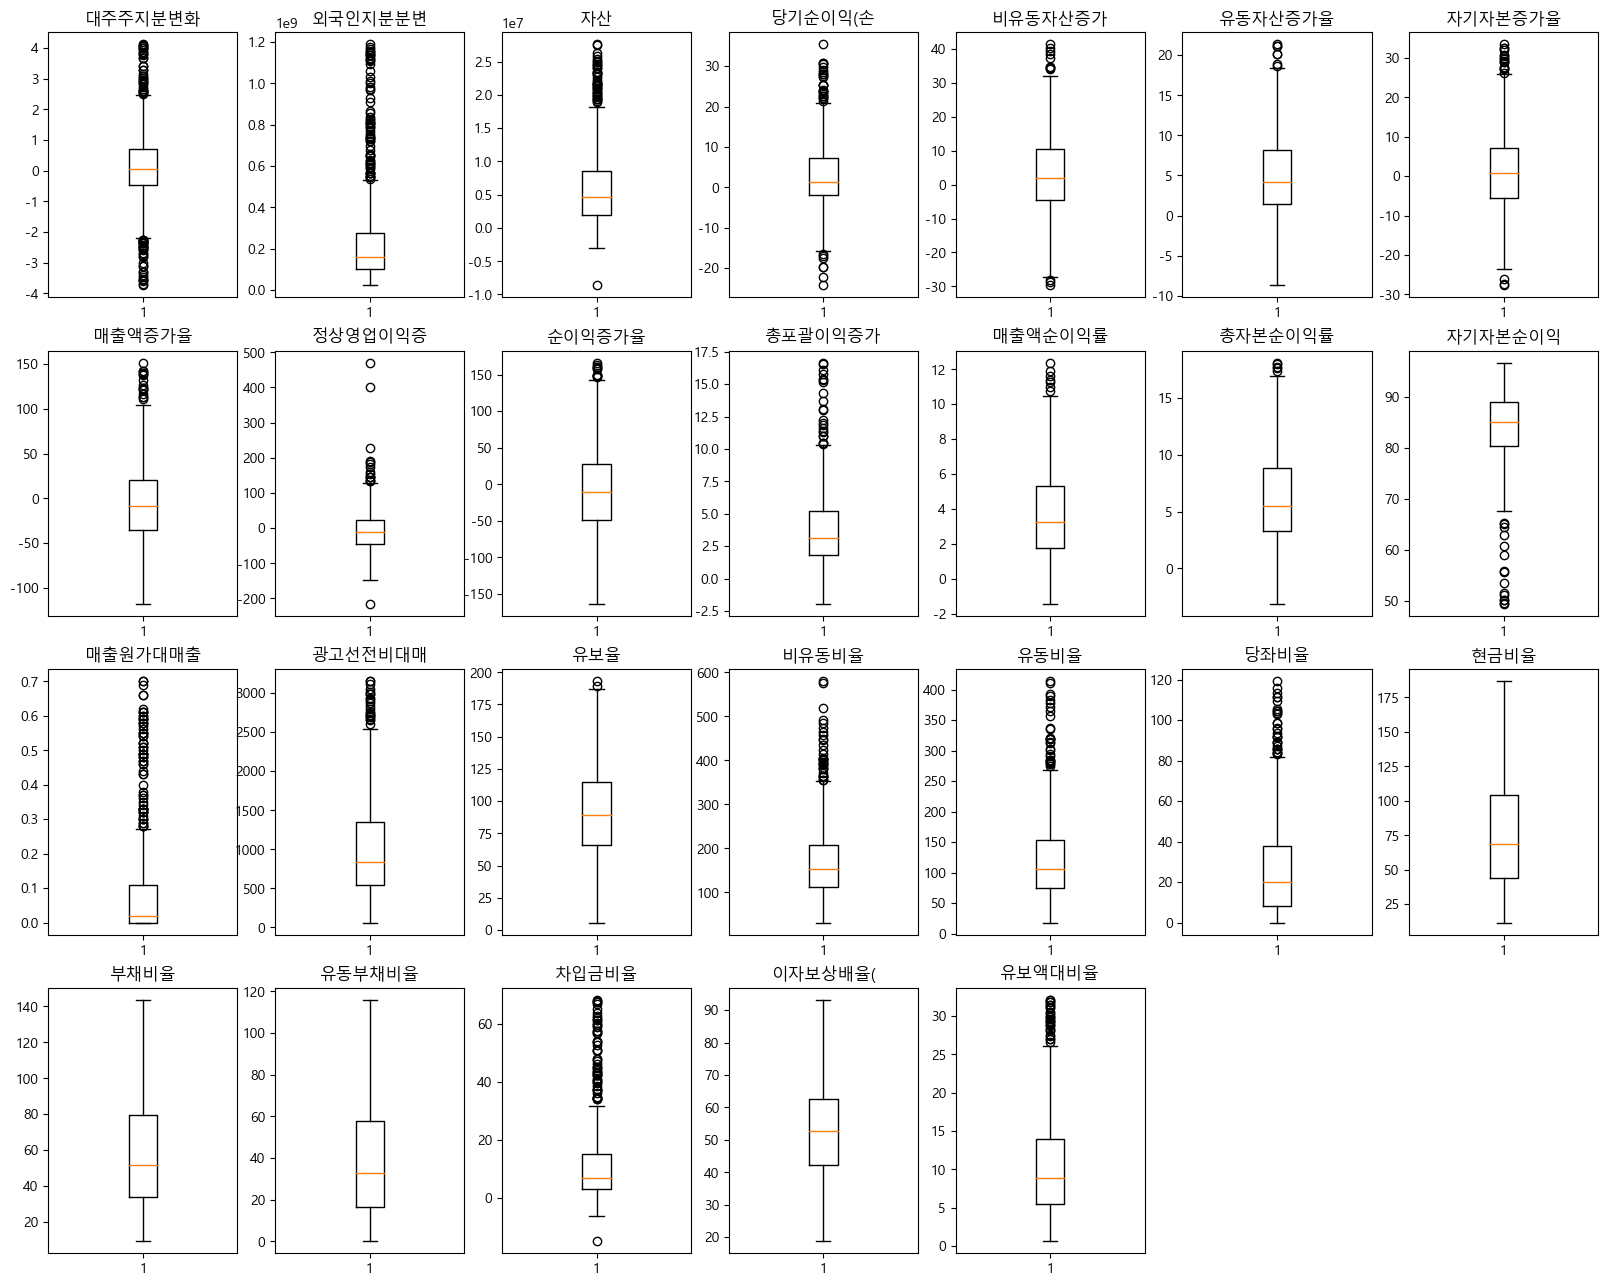

In [458]:
#  숫자현 컬럼만 있는 데이터프레임 생성 
df_수치 = df_수치[df_수치.select_dtypes(float).columns]

# 숫자형 데이터프레임 컬럼 추출
col_int=df_수치.columns

# iqr방식을 이용해서 3사분위수를 초과한 이상치화 1사분위수 미만의 이상치를 제거한 데이터를 박스플롯으로 시각화

plt.figure(figsize=(20,20))

for i in range(1,27,1):
    plt.subplot(5,7,i)
    a = df_수치.iloc[:,i]
    plt.boxplot(a)
    b = col_int.str[:7][i-1]
    plt.title(b)
plt.show()

In [459]:
# # 수치형 데이터와 수치형 데이터를 제외한 데이터 합병
df_iqr = pd.concat([df_명목,df_수치], axis=1)

In [460]:
# 단순 합병으로 인한 결측치 삭제
df_iqr.dropna(axis=0, inplace=True)

In [461]:
# iqr 이상치 제거한 데이터프레임 csv파일로 저장
df_iqr.to_csv("./datasets/이상치제거csv/IQR이상치.csv", encoding="UTF-8-sig")

## ESD
- 평균에서 부터 3표준편차 만큼 떨어져 있는 값(+-0.15%)을 임계값으로 보고 그 값보다 작거나 큰 값을 이상치로 분류한다 

In [462]:
# 숫자 컬럼만 있는 데이터프레임 생성 
df_수치 = df[df.select_dtypes(float).columns]
col_int = df_수치.columns
col_all = df.columns
col_obj = col_all.difference(col_int)
df_명목 = df[col_obj]

In [463]:
### ESD이상치
def EDS_outlier(df=None, col=None,weight=1.5):
    # import numpy as np
    m = np.mean(df[col])
    sd = np.std(df[col])
    sd_weight = sd*weight
    
    lowest = m -sd_weight
    highest = m + sd_weight

    outlier_idx = df[col][ (df[col] < lowest) | (df[col] > highest) ].index
    return outlier_idx

In [464]:
for i in col_int:
    oulier = EDS_outlier(df=df_수치,col= i,weight=2)
    df_수치.drop(index= oulier, axis=0, inplace=True)
    df_수치.reset_index(drop=True, inplace=True)
    

df_수치

C:\Users\msi\AppData\Local\Temp\ipykernel_25148\1286268799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_수치.drop(index= oulier, axis=0, inplace=True)


,대주주지분변화분,외국인지분분변화,자산,당기순이익(손실),비유동자산증가율,유동자산증가율,자기자본증가율,매출액증가율,정상영업이익증가율,순이익증가율,...,유보액대납입자본배율,투자집중도,1인년간평균급여(직원),토빈Q,WW지수,RDS,산업평균_총자산증가율차분,보통주식비율,외국인_주식분포비율,업력
0,3.58,-2.57,72339673.0,8134873.0,-6.84,-12.41,9.84,-2.96,7.05,4.71,...,13.15,125.25,57211.0,0.918080,-1.285584,0.000000,-8.536740,51.79,1.64,38.0
1,-9.82,2.23,381939281.0,10218575.0,-6.42,33.34,4.71,27.90,-26.52,-28.56,...,14.20,119.34,47000.0,0.838334,-0.339797,0.000000,6.505384,41.20,17.56,41.0
2,-0.36,0.43,422833445.0,19448583.0,4.92,20.18,6.10,2.42,22.48,14.79,...,15.09,131.52,47000.0,0.854249,-0.998541,0.000000,10.499253,40.89,17.99,42.0
3,3.58,0.72,417865468.0,16444650.0,-3.08,1.55,3.62,-0.91,10.95,-1.54,...,15.86,133.50,48000.0,0.752419,-1.283361,0.000000,-1.276740,40.88,18.71,43.0
4,-3.45,-4.28,381158251.0,7133940.0,-4.40,-14.77,0.17,-13.64,-50.36,-20.32,...,16.44,140.62,44000.0,0.683091,-0.444794,0.000000,-8.941091,40.88,14.43,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2518,10.07,-4.13,108270892.0,9133611.0,40.27,-21.92,5.70,-0.83,-17.84,-14.32,...,19.91,67.06,49231.0,0.825162,-0.947866,0.000000,-0.972711,38.47,6.00,22.0
2519,-10.06,-0.89,114361714.0,9038905.0,5.99,5.29,7.90,-7.48,-43.76,-1.04,...,21.49,72.25,49107.0,0.889257,0.963709,0.000000,5.525704,38.47,5.11,23.0
2520,0.12,-0.19,174061735.0,3115366.0,-12.32,38.62,-0.34,-9.23,-98.81,-49.93,...,8.94,94.93,45028.0,0.838478,-1.248199,0.000000,4.757289,36.69,1.27,24.0
2521,42.20,-1.98,101649911.0,1240264.0,32.45,-7.21,2.71,-13.47,-48.06,-57.72,...,13.35,158.72,32443.0,0.858263,-1.318499,0.012781,5.817289,46.70,1.29,33.0


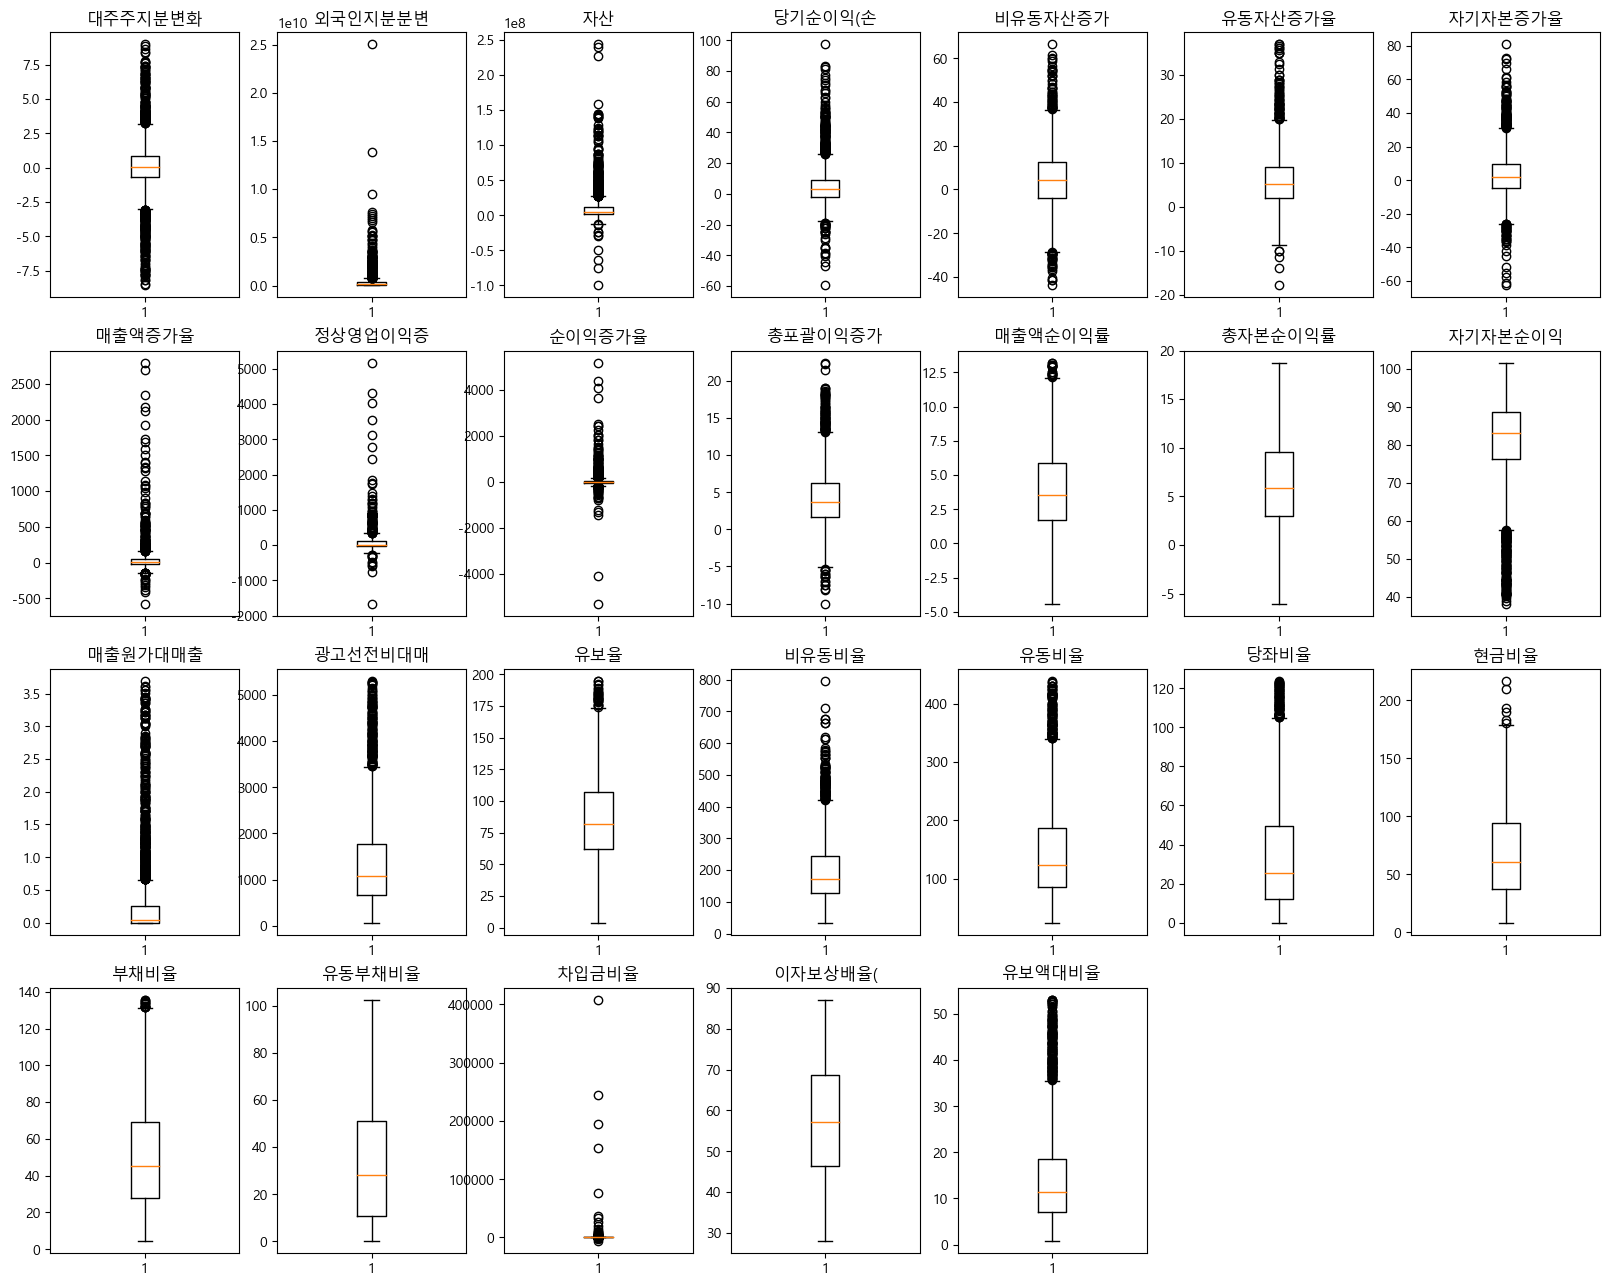

In [465]:
#  숫자현 컬럼만 있는 데이터프레임 생성 
df_수치 = df_수치[df_수치.select_dtypes(float).columns]

# 숫자형 데이터프레임 컬럼 추출
col_int=df_수치.columns

# eds방식을 이용해서 평균에서 2표준편차 이상 벗어난 이상치를 제거한 데이터를 박스플롯으로 시각화

plt.figure(figsize=(20,20))

for i in range(1,27,1):
    plt.subplot(5,7,i)
    a = df_수치.iloc[:,i]
    plt.boxplot(a)
    b = col_int.str[:7][i-1]
    plt.title(b)
plt.show()

In [466]:
# 수치형 데이터와 수치형 데이터를 제외한 데이터 합병
df_esd = pd.concat([df_명목,df_수치], axis=1)

In [467]:
# 단순 합병으로 인한 결측치 삭제
df_esd.dropna(axis=0, inplace=True)

In [468]:
# esd 이상치 제거한 데이터프레임 csv파일로 저장
df_esd.to_csv("./datasets/이상치제거csv/ESD이상치.csv", encoding="UTF-8-sig")

## isolation forest 클러스터

In [469]:
# 숫자 컬럼만 있는 데이터프레임 생성 
df_수치 = df[df.select_dtypes(float).columns]
col_int = df_수치.columns
col_all = df.columns
col_obj = col_all.difference(col_int)
df_명목 = df[col_obj]

In [470]:
# 라이브러리 로그
from sklearn.ensemble import IsolationForest

In [471]:
clf = IsolationForest(max_samples=100, contamination = 0.1, random_state=42)
clf.fit(df_수치)

c:\Users\msi\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, max_samples=100, random_state=42)

In [472]:
# 이상치가 아닌 값 추출해서 데이터프레임 화
isol_df = df_수치[clf.predict(df_수치) != -1]

In [473]:
# 데이터 합볍
df_isol = pd.concat([df_명목, isol_df], axis=1)

In [474]:
# 데이터 단순 합병으로 인한 결측치 제거 
df_isol.dropna(axis=0,inplace=True)

In [475]:
# 데이터 csv로 저장
df_isol.to_csv("./datasets/이상치제거csv/Isol이상치.csv", encoding= "UTF-8-sig")

## k-means clustering

In [476]:
# 숫자 컬럼만 있는 데이터프레임 생성 
df_수치 = df[df.select_dtypes(float).columns]
col_int = df_수치.columns
col_all = df.columns
col_obj = col_all.difference(col_int)
df_명목 = df[col_obj]

In [477]:
# 라이브러리 로그
from sklearn.cluster import KMeans

In [478]:
# KMeans 클러스터링을 이용해서 이상치 제거 (for문을 통해 n_clusters=13 도출)
clf = KMeans(n_clusters=2, random_state=156)
clf.fit(df_수치)
df_km = df_수치[clf.predict(df_수치)==0]

df_km

c:\Users\msi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,대주주지분변화분,외국인지분분변화,자산,당기순이익(손실),비유동자산증가율,유동자산증가율,자기자본증가율,매출액증가율,정상영업이익증가율,순이익증가율,...,유보액대납입자본배율,투자집중도,1인년간평균급여(직원),토빈Q,WW지수,RDS,산업평균_총자산증가율차분,보통주식비율,외국인_주식분포비율,업력
0,-25.96,3.41,9.867886e+08,88002359.0,-4.49,9.23,34.58,15.98,37.98,-30.29,...,0.64,116.48,53000.0,1.367004,-0.677243,0.069506,0.113260,19.06,13.46,63.0
1,25.96,6.69,9.939507e+08,74401732.0,3.63,-4.14,33.31,-12.08,-16.95,24.71,...,1.15,133.86,55000.0,1.090340,-0.444753,0.080072,0.568909,19.63,20.15,64.0
2,0.00,8.16,1.066534e+09,95087399.0,6.69,8.40,22.51,-1.54,-21.09,-21.19,...,1.60,138.53,56000.0,0.939272,-0.671716,0.078906,7.272435,19.77,28.31,65.0
3,-0.14,11.29,1.088890e+09,121159865.0,-3.00,11.19,15.45,20.64,60.45,20.51,...,1.99,125.81,66000.0,1.360663,-0.485689,0.068485,1.991705,19.46,39.60,66.0
4,7.79,-0.11,1.296979e+08,-11627211.0,2.54,-13.66,17.05,4.07,-44.79,1640.29,...,9.41,190.53,49954.0,0.806346,-0.566668,0.000000,-3.530169,54.60,0.02,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9902,0.02,-1.64,7.230676e+07,1483555.0,-1.66,7.22,-2.39,3.23,36.98,-13.13,...,15.66,227.43,39313.0,0.911910,-0.792831,0.013094,2.877289,46.32,0.99,36.0
9903,-15.17,-0.11,8.499057e+07,2187408.0,25.37,11.03,19.63,2.90,-22.12,49.20,...,16.37,235.88,42262.0,1.300222,1.393741,0.015452,17.435704,46.02,0.88,37.0
9904,7.26,5.25,2.824128e+09,62352267.0,-11.45,-13.55,22.91,-13.73,-17.45,46.96,...,32.20,50.36,63000.0,1.048070,-1.550213,0.004735,-12.532711,43.93,17.61,2.0
9905,-22.28,0.23,4.526469e+09,275987686.0,23.68,105.02,136.37,66.54,434.08,463.14,...,80.64,49.21,53000.0,1.152611,3.375684,0.003959,60.175704,43.96,17.84,3.0


In [479]:
# KMeans 클러스터링을 이용해서 이상치 제거
from sklearn.metrics import silhouette_score
clf = KMeans(n_clusters=2, random_state=156)
clf.fit(df_수치)
df_km = df_수치[clf.predict(df_수치)==0]
label = clf.labels_
score_samples = silhouette_score(df_수치,label)
print('silhouette:',score_samples)

c:\Users\msi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette: 0.9858339047422067


In [480]:
# 데이터 합병
df_km = pd.concat([df_명목,df_km], axis=1) 

In [481]:
# 데이터 합병으로 인한 결측치 제거
df_km.dropna(axis = 0, inplace = True)

In [482]:
df_km.to_csv("./datasets/이상치제거csv/Kmeans이상치.csv", encoding = "UTF-8-sig")